In [16]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import scienceplots

In [17]:
T=27
Nt=int(2000*T)
Nz=51

In [18]:
radius_dim=4*u.kpc
r_d_dim = 10*u.kpc
h_d_dim=0.35*u.kpc
l_dim=0.1*u.kpc
you=10*(u.km/u.s)
eta_dim = (1/3)*l_dim*you
h_dim=0.381*u.kpc
td_dim=(h_dim**2/eta_dim.to(u.kpc**2/u.Gyr))
B_0_dim=8.2e-6*u.G
omega_0_dim=127*u.km/(u.s*u.kpc)
r_omega_dim=2*u.kpc

print(td_dim.to(u.Gyr))

omega_dim = omega_0_dim*(1+((radius_dim/r_omega_dim)**2))**(-1/2)
alpha_0_dim=(l_dim**2)*omega_dim/h_dim
#G_dim=-omega_dim
G_dim = -45.6*u.km/(u.s*u.kpc)

U_0_dim=1*u.km/u.s
#km kpc/s
k_dim=0.1*(u.km*u.kpc/u.s)


R_dim=20*u.kpc
z_i_dim = -h_dim
z_f_dim= h_dim


0.42581189007421516 Gyr


In [19]:
z_i=(z_i_dim/h_dim).value
z_f=(z_f_dim/h_dim).value
r = np.linspace(z_i, z_f, Nz)

eta=(eta_dim/eta_dim).value
omega_0=(omega_0_dim.to(1/u.Gyr)*(h_dim/eta_dim)).value
r_omega=(r_omega_dim/z_f_dim).value
h_d=(h_d_dim/h_dim).value
r_d=(r_d_dim/h_dim).value
l=(l_dim/h_dim).value

U_0=((U_0_dim.to(u.kpc/u.Gyr))*eta_dim/h_dim**2).value
#km kpc/s to dimensionless
k=((k_dim.to(u.kpc**2/u.Gyr))/eta_dim).value
B_0=(B_0_dim/B_0_dim).value
R=(R_dim/h_dim).value
radius=(radius_dim/h_dim).value
h=(h_dim/h_dim).value
td=(td_dim*eta_dim/h_dim**2).value
B_eq=B_0*np.exp(-(radius/R))-r**2/(2*h**2)
#alpha=alpha_m+alpha_tilda
U_z=r/h
alpha_0=(alpha_0_dim*h_dim/eta_dim).value
#km/kpc s to dimensionless
G=((G_dim.to(1/u.Gyr))*h_dim**2/eta_dim).value

alpha_tilda=np.sin((np.pi*(r)))


R_alpha=alpha_0 
R_omega=G
R_u=U_0
R_k=k



In [20]:


#open npy 
algebraic_with_outflow = np.load('B_list_alg_2_with_u_10e-3.npy')
algebraic_no_outflow = np.load('B_list_alg_1_10e-3.npy')
dynamic_k3_with_outflow = np.load('dyn_u and k not zero_10e-3.npy')
dynamic_k3_no_outflow = np.load('Dynamic_u0k3_10e-3.npy')
dynamic_k0_with_outflow = np.load('Dynamic_u1k0_10e-3.npy')
dynamic_k0_no_outflow = np.load('Dynamic_u0k0_10e-4.npy')





In [21]:
B_r_list_alg_with_outflow = algebraic_with_outflow[0]
B_phi_list_alg_with_outflow = algebraic_with_outflow[1]

B_r_list_alg_no_outflow = algebraic_no_outflow[0]
B_phi_list_alg_no_outflow = algebraic_no_outflow[1]





#calculating strength of dynamoc flows
B_r_list_dynamic_k3_with_outflow = dynamic_k3_with_outflow[0]
B_phi_list_dynamic_k3_with_outflow = dynamic_k3_with_outflow[1]
B_z_list_dynamic_k3_with_outflow = dynamic_k3_with_outflow[2]

B_r_list_dynamic_k3_no_outflow = dynamic_k3_no_outflow[0]
B_phi_list_dynamic_k3_no_outflow = dynamic_k3_no_outflow[1]
B_z_list_dynamic_k3_no_outflow = dynamic_k3_no_outflow[2]

B_r_list_dynamic_k0_with_outflow = dynamic_k0_with_outflow[0]
B_phi_list_dynamic_k0_with_outflow = dynamic_k0_with_outflow[1]
B_z_list_dynamic_k0_with_outflow = dynamic_k0_with_outflow[2]

B_r_list_dynamic_k0_no_outflow = dynamic_k0_no_outflow[0]
B_phi_list_dynamic_k0_no_outflow = dynamic_k0_no_outflow[1]
B_z_list_dynamic_k0_no_outflow = dynamic_k0_no_outflow[2]

B_tot_dynamic_k3_with_outflow = np.sqrt(B_r_list_dynamic_k3_with_outflow**2 + B_phi_list_dynamic_k3_with_outflow**2 )
B_tot_dynamic_k3_no_outflow = np.sqrt(B_r_list_dynamic_k3_no_outflow**2 + B_phi_list_dynamic_k3_no_outflow**2 )
B_tot_dynamic_k0_with_outflow = np.sqrt(B_r_list_dynamic_k0_with_outflow**2 + B_phi_list_dynamic_k0_with_outflow**2 )
B_tot_dynamic_k0_no_outflow = np.sqrt(B_r_list_dynamic_k0_no_outflow**2 + B_phi_list_dynamic_k0_no_outflow**2 )
B_tot_alg_with_outflow = np.sqrt(B_r_list_alg_with_outflow**2 + B_phi_list_alg_with_outflow**2 )
B_tot_alg_no_outflow = np.sqrt(B_r_list_alg_no_outflow**2 + B_phi_list_alg_no_outflow**2 )

In [22]:
#plot time vs strength
time=np.linspace(0,T,Nt+1)
#make time binto myr using eta_dim and h
time_2 = time*1.45*td_dim
time=time*td_dim
print(td_dim)

print(T)
print(1.45*td_dim)

0.42581189007421516 Gyr
27
0.617427240607612 Gyr


In [23]:
print(np.shape(algebraic_no_outflow))
# print(np.shape(B_tot_alg_no_outflow))
print(np.shape(B_tot_dynamic_k0_no_outflow))
print(np.shape(B_z_list_dynamic_k0_no_outflow))
print(np.shape(time))

(2, 54001, 51)
(54001, 51)
(54001, 51)
(54001,)


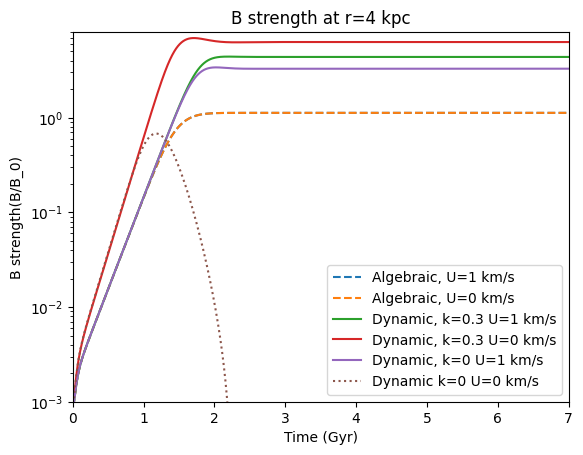

In [24]:
space_index = 25
plt.style.use('science')
plt.plot(time, B_tot_alg_with_outflow[:,space_index], label='Algebraic, U=1 km/s', linestyle='--')
plt.plot(time, B_tot_alg_no_outflow[:,space_index], label='Algebraic, U=0 km/s', linestyle='--')
plt.plot(time, B_tot_dynamic_k3_with_outflow[:,space_index], label='Dynamic, k=0.3 U=1 km/s', linestyle='solid')
plt.plot(time, B_tot_dynamic_k3_no_outflow[:,space_index], label='Dynamic, k=0.3 U=0 km/s', linestyle='solid')
plt.plot(time, B_tot_dynamic_k0_with_outflow[:,space_index], label='Dynamic, k=0 U=1 km/s', linestyle='solid')
plt.plot(time, B_tot_dynamic_k0_no_outflow[:,space_index], label='Dynamic k=0 U=0 km/s', linestyle='dotted')
plt.xlabel('Time (Gyr)')
plt.xlim(0,7)
plt.ylabel('B strength(B/B_0)')
plt.yscale("log")
plt.legend()
plt.ylim(0.001,8)
plt.title('B strength at r=4 kpc')
plt.show()





In [25]:
# #plot pitch angle at r=4 kpc
# #pitch angle is between -pi/2 and pi/2, tan inv(B_r/B_phi)
# pitch_angle_dynamic_k0_no_outflow = np.arctan2( B_phi_list_dynamic_k0_no_outflow,B_r_list_dynamic_k0_no_outflow)
# # pitch_angle_dynamic_k0_with_outflow = np.arctan2(B_r_list_dynamic_k0_with_outflow, B_phi_list_dynamic_k0_with_outflow)
# # pitch_angle_dynamic_k3_no_outflow = np.arctan2(B_r_list_dynamic_k3_no_outflow, B_phi_list_dynamic_k3_no_outflow)
# # pitch_angle_dynamic_k3_with_outflow = np.arctan2(B_r_list_dynamic_k3_with_outflow, B_phi_list_dynamic_k3_with_outflow)



# # pitch_angle_degrees_k0_no_outflow = np.degrees(pitch_angle_dynamic_k0_no_outflow)
# # pitch_angle_degrees_k0_with_outflow = np.degrees(pitch_angle_dynamic_k0_with_outflow)
# # pitch_angle_degrees_k3_no_outflow = np.degrees(pitch_angle_dynamic_k3_no_outflow)
# # pitch_angle_degrees_k3_with_outflow = np.degrees(pitch_angle_dynamic_k3_with_outflow)
# # Calculate pitch angle

# #plotting
# #pitch angle have to be between -pi/2 and pi/2
# i=45000
    # y = np.where(pitch_angle_dynamic_k3_with_outflow[i] > np.pi / 2, pitch_angle_dynamic_k3_with_outflow[i] - np.pi, pitch_angle_dynamic_k3_with_outflow[i])
#     # y = np.where(y <= -np.pi / 2, y + np.pi, y)
# plt.plot(r, pitch_angle_degrees_k0_no_outflow[i], label='Dynamic, k=0 U=0 km/s', linestyle='dotted')
# plt.plot(r, pitch_angle_degrees_k0_with_outflow[i], label='Dynamic, k=0 U=1 km/s', linestyle='solid')
# plt.plot(r, pitch_angle_degrees_k3_no_outflow[i], label='Dynamic, k=0.3 U=0 km/s', linestyle='dotted')
# plt.plot(r, pitch_angle_degrees_k3_with_outflow[i], label='Dynamic, k=0.3 U=1 km/s', linestyle='solid')

            
   
# plt.xlabel('z( x 0.4 kpc)')
# plt.xlim(0,1)
# # plt.ylim(-10,0)
# plt.ylabel('Pitch angle(degrees)')
# plt.legend()
# plt.show()


In [26]:
print(B_phi_list_dynamic_k0_no_outflow.shape)

(54001, 51)


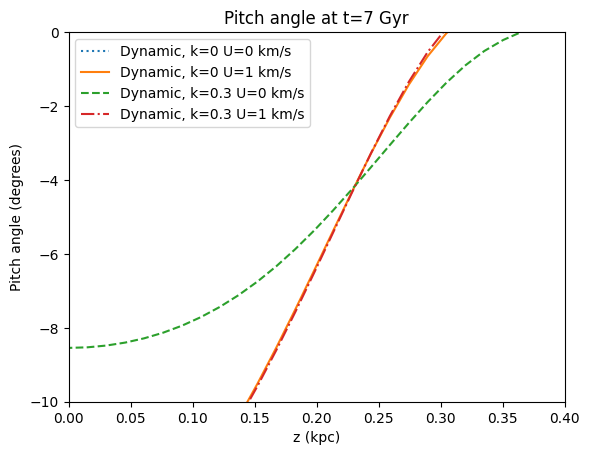

In [31]:
time_index = -1
space_end=50
pitch_angle_dynamic_k0_no_outflow = np.arctan(B_r_list_dynamic_k0_no_outflow[time_index][:space_end]/B_phi_list_dynamic_k0_no_outflow[time_index][:space_end]) * 180 / np.pi
pitch_angle_dynamic_k0_with_outflow = np.arctan(B_r_list_dynamic_k0_with_outflow[time_index][:space_end]/B_phi_list_dynamic_k0_with_outflow[time_index][:space_end]) * 180 / np.pi
pitch_angle_dynamic_k3_no_outflow = np.arctan(B_r_list_dynamic_k3_no_outflow[time_index][:space_end]/B_phi_list_dynamic_k3_no_outflow[time_index][:space_end]) * 180 / np.pi
pitch_angle_dynamic_k3_with_outflow = np.arctan(B_r_list_dynamic_k3_with_outflow[time_index][:space_end]/B_phi_list_dynamic_k3_with_outflow[time_index][:space_end]) * 180 / np.pi


plt.plot(r[:space_end]*h_dim, pitch_angle_dynamic_k0_no_outflow, label='Dynamic, k=0 U=0 km/s', linestyle='dotted')
plt.plot(r[:space_end]*h_dim, pitch_angle_dynamic_k0_with_outflow, label='Dynamic, k=0 U=1 km/s', linestyle='solid')
plt.plot(r[:space_end]*h_dim, pitch_angle_dynamic_k3_no_outflow, label='Dynamic, k=0.3 U=0 km/s', linestyle='dashed')
plt.plot(r[:space_end]*h_dim, pitch_angle_dynamic_k3_with_outflow, label='Dynamic, k=0.3 U=1 km/s', linestyle='-.')
plt.xlabel('z (kpc)')
plt.xlim(0,0.4)
plt.ylim(-10,0)
plt.ylabel('Pitch angle (degrees)')
plt.title('Pitch angle at t=7 Gyr')
plt.legend()
plt.show()

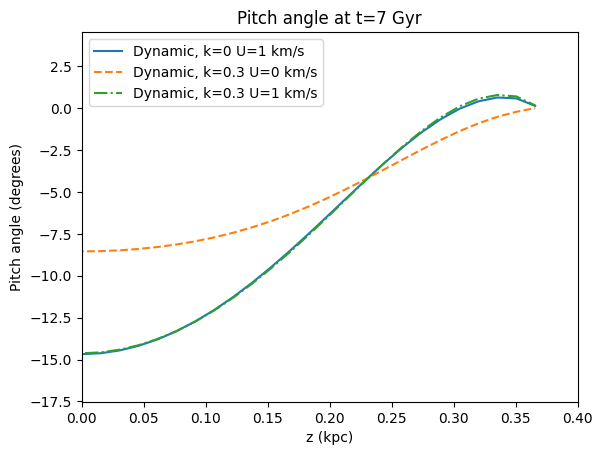

In [28]:
time_index = -1
space_end=50
pitch_angle_dynamic_k0_with_outflow = np.arctan(B_r_list_dynamic_k0_with_outflow[time_index][:space_end]/B_phi_list_dynamic_k0_with_outflow[time_index][:space_end]) * 180 / np.pi
pitch_angle_dynamic_k3_no_outflow = np.arctan(B_r_list_dynamic_k3_no_outflow[time_index][:space_end]/B_phi_list_dynamic_k3_no_outflow[time_index][:space_end]) * 180 / np.pi
pitch_angle_dynamic_k3_with_outflow = np.arctan(B_r_list_dynamic_k3_with_outflow[time_index][:space_end]/B_phi_list_dynamic_k3_with_outflow[time_index][:space_end]) * 180 / np.pi


plt.plot(r[:space_end]*h_dim, pitch_angle_dynamic_k0_with_outflow, label='Dynamic, k=0 U=1 km/s', linestyle='solid')
plt.plot(r[:space_end]*h_dim, pitch_angle_dynamic_k3_no_outflow, label='Dynamic, k=0.3 U=0 km/s', linestyle='dashed')
plt.plot(r[:space_end]*h_dim, pitch_angle_dynamic_k3_with_outflow, label='Dynamic, k=0.3 U=1 km/s', linestyle='-.')
plt.xlabel('z (kpc)')
# plt.ylim(-10,0)
plt.xlim(0,0.4)
plt.ylabel('Pitch angle (degrees)')
plt.title('Pitch angle at t=7 Gyr')
plt.legend()
plt.show()

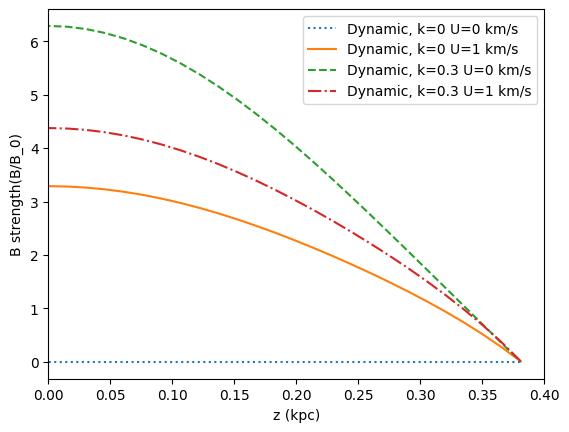

In [29]:
time_index = -1

plt.plot(r*h_dim, B_tot_dynamic_k0_no_outflow[time_index], label='Dynamic, k=0 U=0 km/s', linestyle='dotted')
plt.plot(r*h_dim, B_tot_dynamic_k0_with_outflow[time_index], label='Dynamic, k=0 U=1 km/s', linestyle='solid')
plt.plot(r*h_dim, B_tot_dynamic_k3_no_outflow[time_index], label='Dynamic, k=0.3 U=0 km/s', linestyle='dashed')
plt.plot(r*h_dim, B_tot_dynamic_k3_with_outflow[time_index], label='Dynamic, k=0.3 U=1 km/s', linestyle='-.')

plt.xlabel('z (kpc)')
plt.xlim(0,0.4)
plt.ylabel('B strength(B/B_0)')
plt.legend()
plt.show()

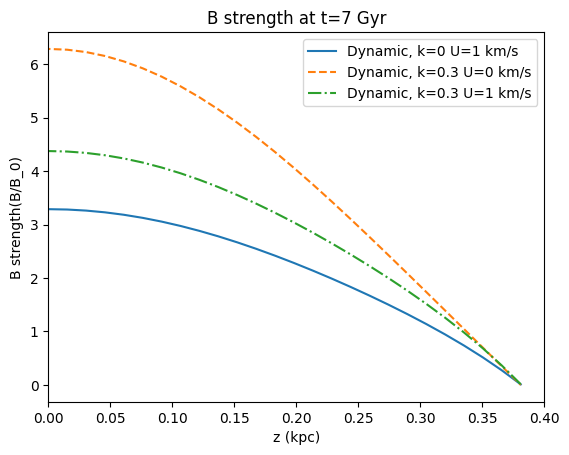

In [30]:
time_index = -1

plt.plot(r*h_dim, B_tot_dynamic_k0_with_outflow[time_index], label='Dynamic, k=0 U=1 km/s', linestyle='solid')
plt.plot(r*h_dim, B_tot_dynamic_k3_no_outflow[time_index], label='Dynamic, k=0.3 U=0 km/s', linestyle='dashed')
plt.plot(r*h_dim, B_tot_dynamic_k3_with_outflow[time_index], label='Dynamic, k=0.3 U=1 km/s', linestyle='-.')
plt.title('B strength at t=7 Gyr')
plt.xlabel('z (kpc)')
plt.xlim(0,0.4)
plt.ylabel('B strength(B/B_0)')
plt.legend()
plt.show()